<a href="https://colab.research.google.com/github/g-r-a-e-m-e/essential-math-for-data-science/blob/main/chapter_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05
## Linear Regression

### A Basic Linear Regression

m = [1.93939394]
b = [4.73333333]


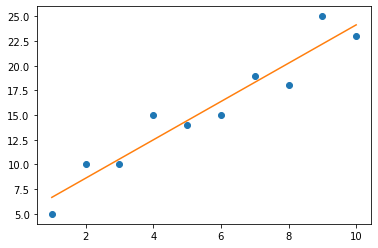

In [1]:
# Example 5-1. Using scikit-learn to do a linear regression

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables
X = df.values[:, : -1]

# Extract output
Y = df.values[:, -1]

# Fit a line to the points
model = LinearRegression().fit(X, Y)

# Get parameters
m = model.coef_.flatten()
b = model.intercept_.flatten()

# Print coefficient and intercept
print(f"m = {m}\nb = {b}")

# Plot
plt.plot(X, Y, 'o')
plt.plot(X, m*X+b)
plt.show()

#### Residuals and Squared Errors

In [2]:
# Example 5-2. Calculating the residuals for a given line and data

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

# Calculate the residuals
for p in points:
  y_actual = p.y
  y_predict = m*p.x+b
  residual = y_actual - y_predict
  print(residual)

-1.67272
1.3878900000000005
-0.5515000000000008
2.5091099999999997
-0.4302799999999998
-1.3696699999999993
0.6909400000000012
-2.2484499999999983
2.812160000000002
-1.1272299999999973


In [3]:
# Example 5-4. Calculating the sum of squares for a given line and data

import pandas as pd

# Import points
points = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples()

# Test with a given line
m = 1.93939
b = 4.73333

sum_of_squares = 0.0

# Calculate the sum of squares
for p in points:
  y_actual = p.y
  y_predict = m*p.x+b
  residual_squared = (y_predict - y_actual)**2
  sum_of_squares += residual_squared
  
print(f"Sum of squares = {sum_of_squares}")

Sum of squares = 28.096969704500005


### Finding the Best Fit Line

#### Closed Form Equation

In [4]:
# Example 5-5

import pandas as pd

points = list(pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',').itertuples())

n = len(points)

m = (n * sum(p.x * p.y for p in points) - sum(p.x for p in points) *
     sum(p.y for p in points)) / (n * sum(p.x**2 for p in points) - 
                                  sum(p.x for p in points)**2)

b = (sum(p.y for p in points) / n) - m * sum(p.x for p in points) / n

print(m, b)

1.9393939393939394 4.7333333333333325


#### Inverse Matrix Techniques

In [5]:
from operator import inv
# Example 5-6 Using inverse and transposes matrices to fit a linear regression

import pandas as pd
from numpy.linalg import inv
import numpy as np

# Import points
df = pd.read_csv('https://bit.ly/3goOAnt', delimiter = ',')

# Extract input variables
X = df.values[:, : -1].flatten()

# Add dummy variable column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column
y = df.values[:, -1]

# Calculate coefficients for slope an intercept
b = inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ y)
print(b)

# Predict against the y-values
y_predict = X_1.dot(b)


[1.93939394 4.73333333]
